# Introduction: 
This is analysis of Kaggle's Titanic - Machine Learning from Disaster dataset where the objective is to predict whether a passenger on the Titanic would have survived based on certain criteria. Much of the learning for this was through the Udemy Python for Data Science and Machine Learning Bootcamp.

The steps taken in this approach are as follows:
### 1. Exploratory Data Analysis
### 2. Data Cleaning
### 3. Feature Engineering
### 4. ML Modeling

### Variable   / 	Definition   / 	 Key

survival   / 	Survival   / 	0 = No, 1 = Yes

pclass /	Ticket class / 	1 = 1st, 2 = 2nd, 3 = 3rd

sex  /	Sex	

Age  /	Age in years	

sibsp   /	# of siblings and spouses aboard the Titanic	

parch   /	# of parents and children aboard the Titanic	

ticket  /	Ticket number	

fare   / 	Passenger fare	

cabin  /  	Cabin number	

embarked   / 	Port of Embarkation  /   C = Cherbourg, Q = Queenstown, S = Southampton

###### Importing Libraries

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# Futurewarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###### Reading training and test csv files

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

We can see the columns for the data below. 891 records, some null values for the Age and Cabin columns.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test data also seems to have approximately the same ratio of Age and Cabin records missing. 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1. Exploratory Data Analysis

In [7]:
datasets = [train, test]

We can see that women were more likely to survive than men. It was known that women and children were prioritised into the lifeboats after the iceberg collision.

In [8]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

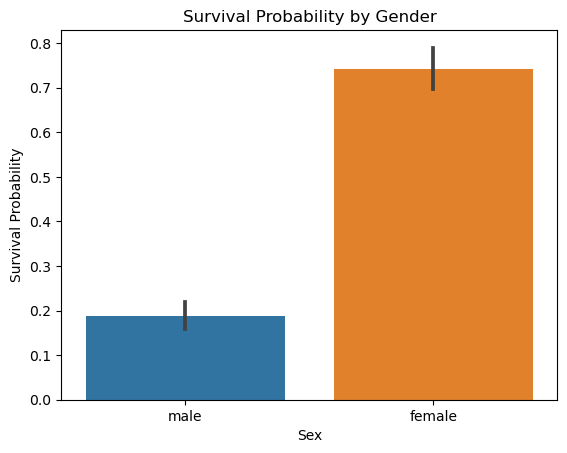

In [9]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

Here we can see the rate of survival for 1st class passengers was higher than the 2nd which was then higher than 3rd. Assuming this confirms the more wealthy passengers were prioritised into lifeboats. 

In [10]:
train['Survived'] = train['Survived'].astype(int)
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

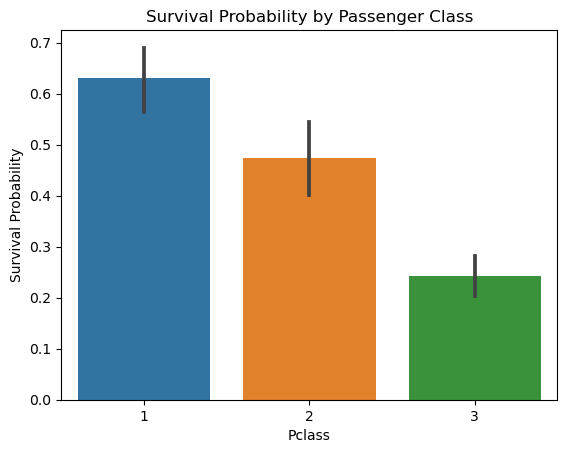

In [11]:
train['Pclass'] = train['Pclass'].astype(int)

sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

Females were prioritised across all passenger classes. Even the 3rd class females had a higher rate of survival than the 1st class males. We can clearly see the class divide here too as 3rd class females had nearly half the chance of survival than the 1st and 2nd classes. Males in 1st class had about double the chance than the lower classes.

Text(0.5, 1.0, 'Survival Probability by Sex & Passenger Class')

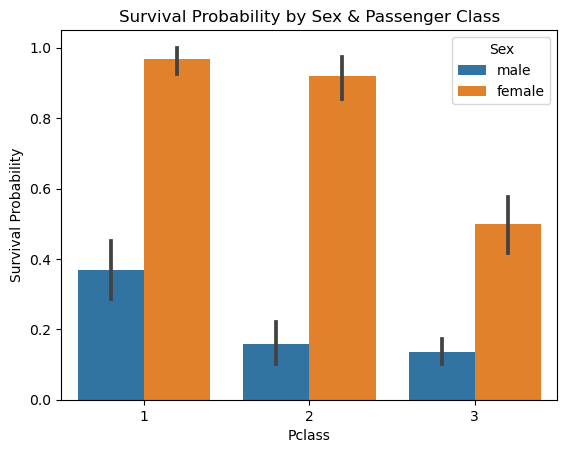

In [12]:
sns.barplot(x = 'Pclass', y ='Survived', data = train, hue='Sex')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex & Passenger Class')

## 2. Data Cleaning

Many values missing for the Cabin and Age columns. 
1 Fare value missing in the test set. 

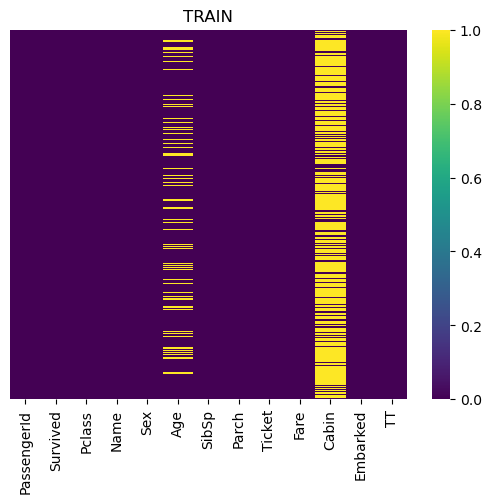

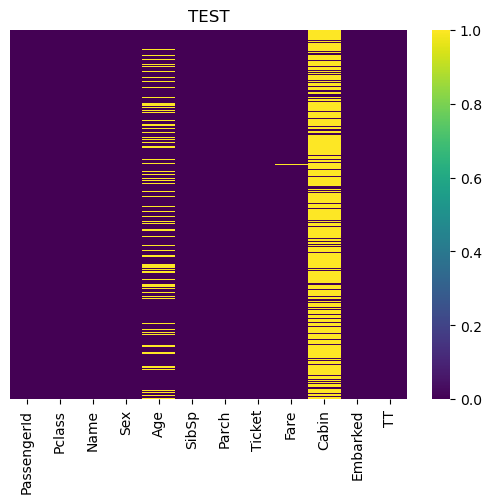

In [13]:
#ANALYSIS OF NULL VALUES
# ADD IDENTIFIER COLUMNS FOR HEATMAPS DISPLAY
train['TT'] = 'TRAIN'
#train.drop('Survived', axis=1, inplace=True)
test['TT'] = 'TEST'

for data in datasets:
    fig, ax = plt.subplots(1,1)
    ax.set_title(data['TT'][0])

    ax = sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

Will get the median age of the passenger classes in the training set and impute the ages to the null values, again based on their class.

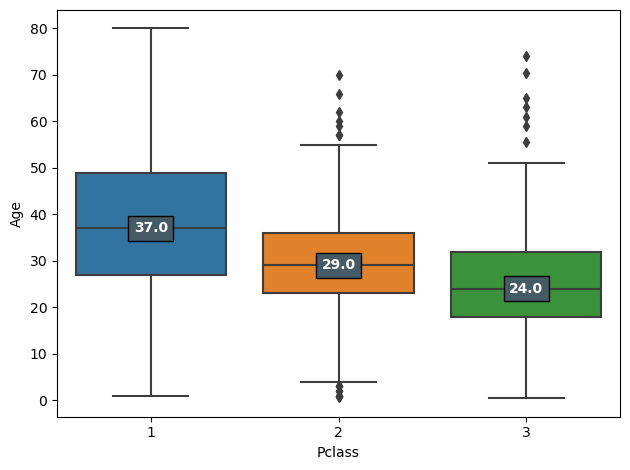

In [14]:
# Find Median Age of Classes
box_plot = sns.boxplot(data=train, x='Pclass', y='Age')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

In [15]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
# Impute age for missing values
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

Filled the missing fare on the test set with the mean of the fares. 

In [16]:
test.fillna({'Fare': train['Fare'].mean()}, inplace=True)

Cabin column dropped due to too many null values. Not a great way of using the data that is here. 

In [17]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

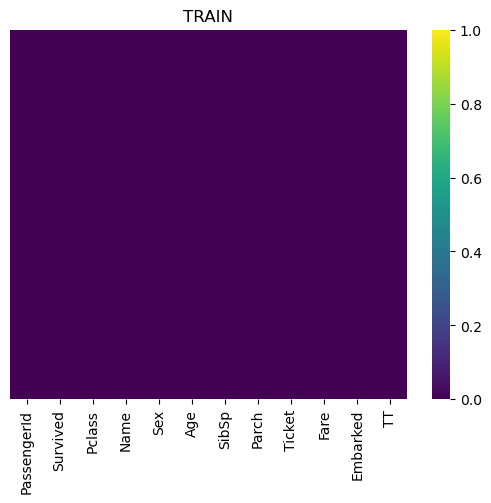

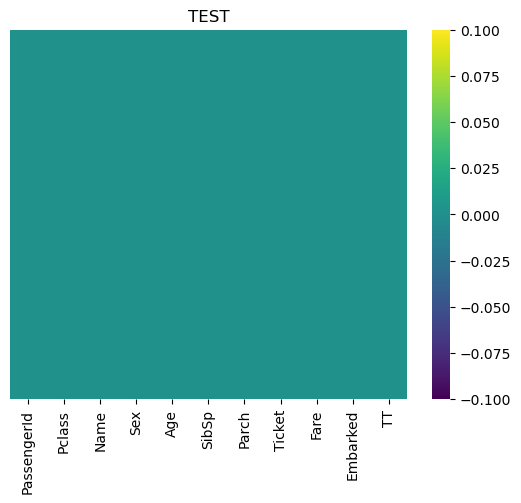

In [18]:
for data in datasets:
    fig, ax = plt.subplots(1,1)
    ax.set_title(data['TT'][0])

    ax = sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

Not visible on the training heatmap are 2 Embarked null values. Will just fill them as 'S' embarked as it's most common.

In [19]:
train.isnull().sum().sort_values(ascending = False)

Embarked       2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
TT             0
dtype: int64

In [20]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
train['Embarked'].fillna('S', inplace=True)

No more null values

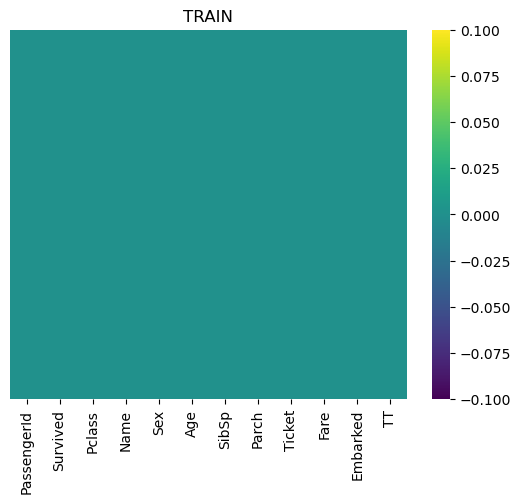

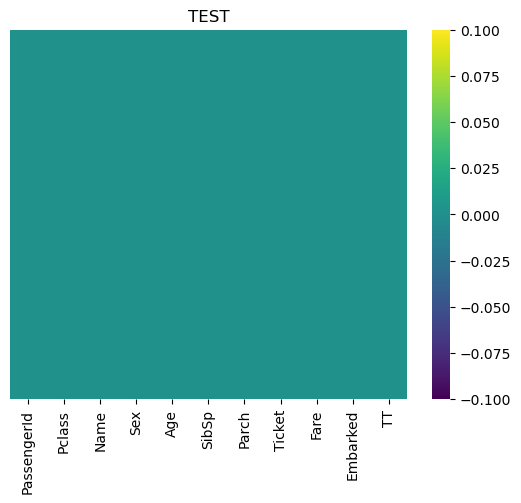

In [22]:
for data in datasets:
    fig, ax = plt.subplots(1,1)
    ax.set_title(data['TT'][0])

    ax = sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

## 3. Feature Engineering

### Title
Created from the Name column

In [23]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [24]:
train['Title'] = [name.split('.')[0].split(',')[1].replace(" ", "") for name in train['Name']]
train[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [25]:
train['Title'].value_counts()

Title
Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: count, dtype: int64

In [26]:
def title_conv(title):
    if title == 'Major' or title == 'Col' or title == 'Capt':
        title = 'Male - Military'
    elif title == 'Mlle' or title == 'Mme' or title == 'Ms':
        title = 'Miss'
    elif title == 'theCountess' or title == 'Lady' or title == 'Sir'\
            or title == 'Don' or title == 'Dona' or title == 'Jonkheer':
        title = 'Other'

    return title

train['Title'] = train['Title'].apply(title_conv)

In [27]:
train['Title'].value_counts()

Title
Mr                 517
Miss               186
Mrs                125
Master              40
Dr                   7
Rev                  6
Other                5
Male - Military      5
Name: count, dtype: int64

In [28]:
train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
5,Mrs,0.792000
3,Miss,0.704301
6,Other,0.600000
2,Master,0.575000
0,Dr,0.428571
1,Male - Military,0.400000
4,Mr,0.156673
7,Rev,0.000000


Text(0.5, 1.0, 'Mean of survival by Title')

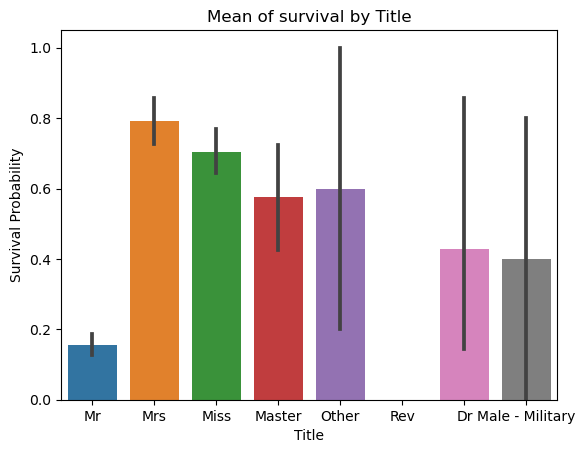

In [29]:
sns.barplot(x = 'Title', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [30]:
test['Title'] = [name.split('.')[0].split(',')[1].replace(" ", "") for name in test['Name']]
test['Title'] = test['Title'].apply(title_conv)
test['Title'].value_counts()

Title
Mr                 240
Miss                79
Mrs                 72
Master              21
Male - Military      2
Rev                  2
Dr                   1
Other                1
Name: count, dtype: int64

### Ticket
Had to analyse the most common prefixes as well as noting which tickets were simply integers to make use of the column. 

In [31]:
train['Ticket'].head(25)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
Name: Ticket, dtype: object

In [32]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [33]:
def ticket_conv(ticketcol):
    tick = (ticketcol.split(' ')[0])
    if tick.isdigit():
        tick = 'Int'
    else:
        return tick

    return tick

train['Ticket'] = train['Ticket'].apply(ticket_conv)

In [34]:
train['Ticket'].head(25)

0          A/5
1           PC
2     STON/O2.
3          Int
4          Int
5          Int
6          Int
7          Int
8          Int
9          Int
10          PP
11         Int
12        A/5.
13         Int
14         Int
15         Int
16         Int
17         Int
18         Int
19         Int
20         Int
21         Int
22         Int
23         Int
24         Int
Name: Ticket, dtype: object

In [35]:
train['Ticket'].nunique()

44

In [36]:
train['Ticket'].value_counts()

Ticket
Int           661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
F.C.C.          5
C               5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
LINE            4
A/4             3
PP              3
A/4.            3
S.O./P.P.       3
SC/AH           3
A.5.            2
A./5.           2
P/PP            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.W./PP         1
F.C.            1
A/S             1
SO/C            1
W/C             1
SC              1
SCO/W           1
SW/PP           1
Fa              1
S.O.P.          1
S.C./A.4.       1
A4.             1
S.P.            1
W.E.P.          1
C.A./SOTON      1
Name: count, dtype: int64

In [37]:
train['Ticket'] = train['Ticket'].apply(lambda x: x.replace('.', ''))

In [38]:
train['Ticket'].value_counts()

Ticket
Int         661
PC           60
CA           41
A/5          19
SOTON/OQ     15
STON/O       12
W/C          10
SC/PARIS      7
STON/O2       6
A/4           6
FCC           5
C             5
SOC           5
SC/Paris      4
LINE          4
PP            3
SO/PP         3
SC/AH         3
P/PP          2
SOTON/O2      2
WE/P          2
A5            2
SW/PP         2
FC            1
A/S           1
SC            1
SO/C          1
SCO/W         1
Fa            1
SOP           1
SC/A4         1
A4            1
SP            1
WEP           1
CA/SOTON      1
Name: count, dtype: int64

In [39]:
def further_ticket_conv(ticket):
    if ticket == 'Int':
        pass
    elif ticket not in ['PC', 'CA', 'A/5', 'SOTON/OQ',  'STON/O', 'W/C']:
        ticket = 'String_Other'
    else:
        pass
    
    return ticket

train['Ticket'] = train['Ticket'].apply(further_ticket_conv)
train['Ticket'].value_counts()

Ticket
Int             661
String_Other     73
PC               60
CA               41
A/5              19
SOTON/OQ         15
STON/O           12
W/C              10
Name: count, dtype: int64

Text(0.5, 1.0, 'Mean of survival by Ticket')

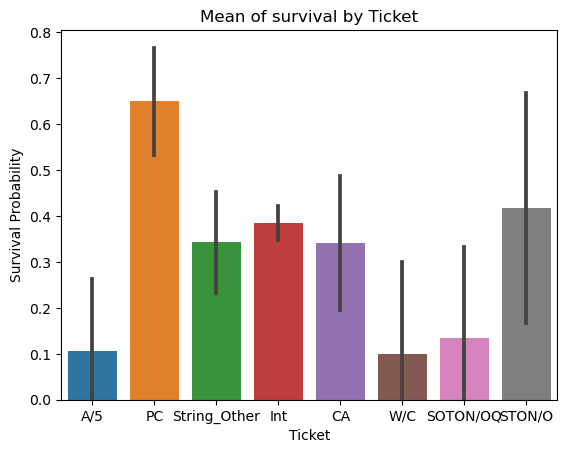

In [40]:
train[['Ticket', 'Survived']].groupby(['Ticket'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)
sns.barplot(x = 'Ticket', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Ticket')

Apply the conversions to the test data

In [41]:
test['Ticket'] = test['Ticket'].apply(ticket_conv)
test['Ticket'] = test['Ticket'].apply(lambda x: x.replace('.', ''))
test['Ticket'] = test['Ticket'].apply(further_ticket_conv)
test['Ticket'].value_counts()

Ticket
Int             296
String_Other     41
PC               32
CA               27
SOTON/OQ          9
A/5               6
W/C               5
STON/O            2
Name: count, dtype: int64

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  TT           891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int32(2), int64(3), object(6)
memory usage: 83.7+ KB


In [43]:
# Create dummy dataframes to convert string values to booleans
for data in datasets:
    #CREATE DUMMY DATAFRAMES TO CONVERT SEX TO A BOOLEAN VALUE FOR ISMALE
    sex = pd.get_dummies(data['Sex'], drop_first=True)

    #CREATE DUMMY DATAFRAME FOR EMBARKED VALUES.
    embarked = pd.get_dummies(data['Embarked'], drop_first=True)

    # CREATE DUMMY DATAFRAME FOR TICKET VALUES.
    dummy_tickets = pd.get_dummies(data['Ticket'], drop_first=True)
    #print(dummy_tickets.head(5).to_string())

    # CREATE DUMMY DATAFRAME FOR TITLE VALUES.
    dummy_titles = pd.get_dummies(data['Title'], drop_first=True)
    #print(dummy_titles.head(5).to_string())

    test_or_train_id = data['TT'][0]
    #DROP STRING FIELDS THAT THE MODEL CAN'T DO ANYTHING WITH
    data.drop(['Sex', 'Embarked', 'Name', 'TT', 'Ticket', 'Title'], axis=1, inplace=True)

    #ADD DUMMY DATAFRAMES TO THE DATA
    if test_or_train_id == 'TRAIN':
        train_data = pd.concat([data,sex,embarked, dummy_titles, dummy_tickets], axis=1)
    else:
        test_data = pd.concat([data,sex,embarked, dummy_titles, dummy_tickets], axis=1)

In [44]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,Mrs,Other,Rev,CA,Int,PC,SOTON/OQ,STON/O,String_Other,W/C
0,1,0,3,22.0,1,0,7.2500,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,...,True,False,False,False,True,False,False,False,False,False
4,5,0,3,35.0,0,0,8.0500,True,False,True,...,False,False,False,False,True,False,False,False,False,False


Data now in correct format for Machine Learning Model training. 

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int32  
 2   Pclass           891 non-null    int32  
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   male             891 non-null    bool   
 8   Q                891 non-null    bool   
 9   S                891 non-null    bool   
 10  Male - Military  891 non-null    bool   
 11  Master           891 non-null    bool   
 12  Miss             891 non-null    bool   
 13  Mr               891 non-null    bool   
 14  Mrs              891 non-null    bool   
 15  Other            891 non-null    bool   
 16  Rev              891 non-null    bool   
 17  CA              

In [46]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Male - Military,...,Mrs,Other,Rev,CA,Int,PC,SOTON/OQ,STON/O,String_Other,W/C
0,892,3,34.5,0,0,7.8292,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,893,3,47.0,1,0,7.0000,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
2,894,2,62.0,0,0,9.6875,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,895,3,27.0,0,0,8.6625,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,896,3,22.0,1,1,12.2875,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False


In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Age              418 non-null    float64
 3   SibSp            418 non-null    int64  
 4   Parch            418 non-null    int64  
 5   Fare             418 non-null    float64
 6   male             418 non-null    bool   
 7   Q                418 non-null    bool   
 8   S                418 non-null    bool   
 9   Male - Military  418 non-null    bool   
 10  Master           418 non-null    bool   
 11  Miss             418 non-null    bool   
 12  Mr               418 non-null    bool   
 13  Mrs              418 non-null    bool   
 14  Other            418 non-null    bool   
 15  Rev              418 non-null    bool   
 16  CA               418 non-null    bool   
 17  Int             

## 4. ML Modeling

In [48]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis=1)

Tested the accuracy of many different models to determine which would be the most suitable for predicting the surivival status of the test set.

In [49]:
# LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train, y_train)
logreg_predictions = logmodel.predict(X_test)
acc_log = round(logmodel.score(X_train, y_train) * 100, 2)
acc_log

83.5

In [50]:
# DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
tree_predictions = dtree.predict(X_test)
acc_decision_tree = round(dtree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.88

In [51]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=700)
rf.fit(X_train, y_train)
forest_predictions = rf.predict(X_test)
acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
acc_random_forest

98.88

In [52]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

68.57

In [53]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
acc_gridCV = round(grid.score(X_train, y_train) * 100, 2)
acc_gridCV

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.615 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.624 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.615 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.612 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.603 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

83.61

Decision Tree and Random Forest showing the most accurate method. Going with Random Forest though as they generally outperform Decision Trees.

In [54]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'GridSearchCVs'],
                       'Score': [acc_log, acc_decision_tree, acc_random_forest, acc_svc, acc_gridCV]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Decision Tree,98.88
1,Random Forest,98.88
2,GridSearchCVs,83.61
3,Logistic Regression,83.50
4,Support Vector Machines,68.57


In [55]:
# RandomForestClassifier for test
forest_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
test_data['Survived'] = forest_predictions
titanic_predictions = test_data[['PassengerId', 'Survived']]

titanic_predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


The correct shape for the submission csv

In [57]:
titanic_predictions.shape

(418, 2)

In [58]:
titanic_predictions.to_csv('titanic_predictions.csv', index=False)

Kaggle came back with a score of 75.4%. Not too bad, there were some optimisations I could've done for the Random Forest n_estimators and there were potentially some columns I should've omitted as they may have confused the models like the ticket. 

Overall, predicting 3 out of 4 passengers is good. 